## Pichon Jonathan
## Moudam Ayoub

# Image - Machine Learning

La grande partie de ce qui a été fait s'appuie très largement sur le code fournie par le github de [antonior92](https://github.com/antonior92/automatic-ecg-diagnosis).\
Le modèle a été réutilisé tel qu'il est fourni et le fichiers `train.py` et `predict.py` réutilisés sans modifications.
Pour résumer on s'est contenté d'entraîner des réseaux de neuronnes sur les données que nous avont reçu et afficher leurs résultats.

Les codes utilisés seront donnés dans les fichiers fournis avec le notebook. Les données sont non fournies et il faudra indiquer leur emplacement dans le fichier `constants.py` pour éxecuter ce notebook.\
Les modèles ont été entraîné sur une machine personelle disposant d'un GPU. Les poids des modèles ainsi que des prédictions sont fournies avec le notebook.

In [1]:
import tests as tests
import plots as plotter
import runner as runner
from constants import *

## Les données "Ribeiro"

Aucun travail n'a été effectuée sur les données et elles ont été utilisées telle qu'on les as reçues.

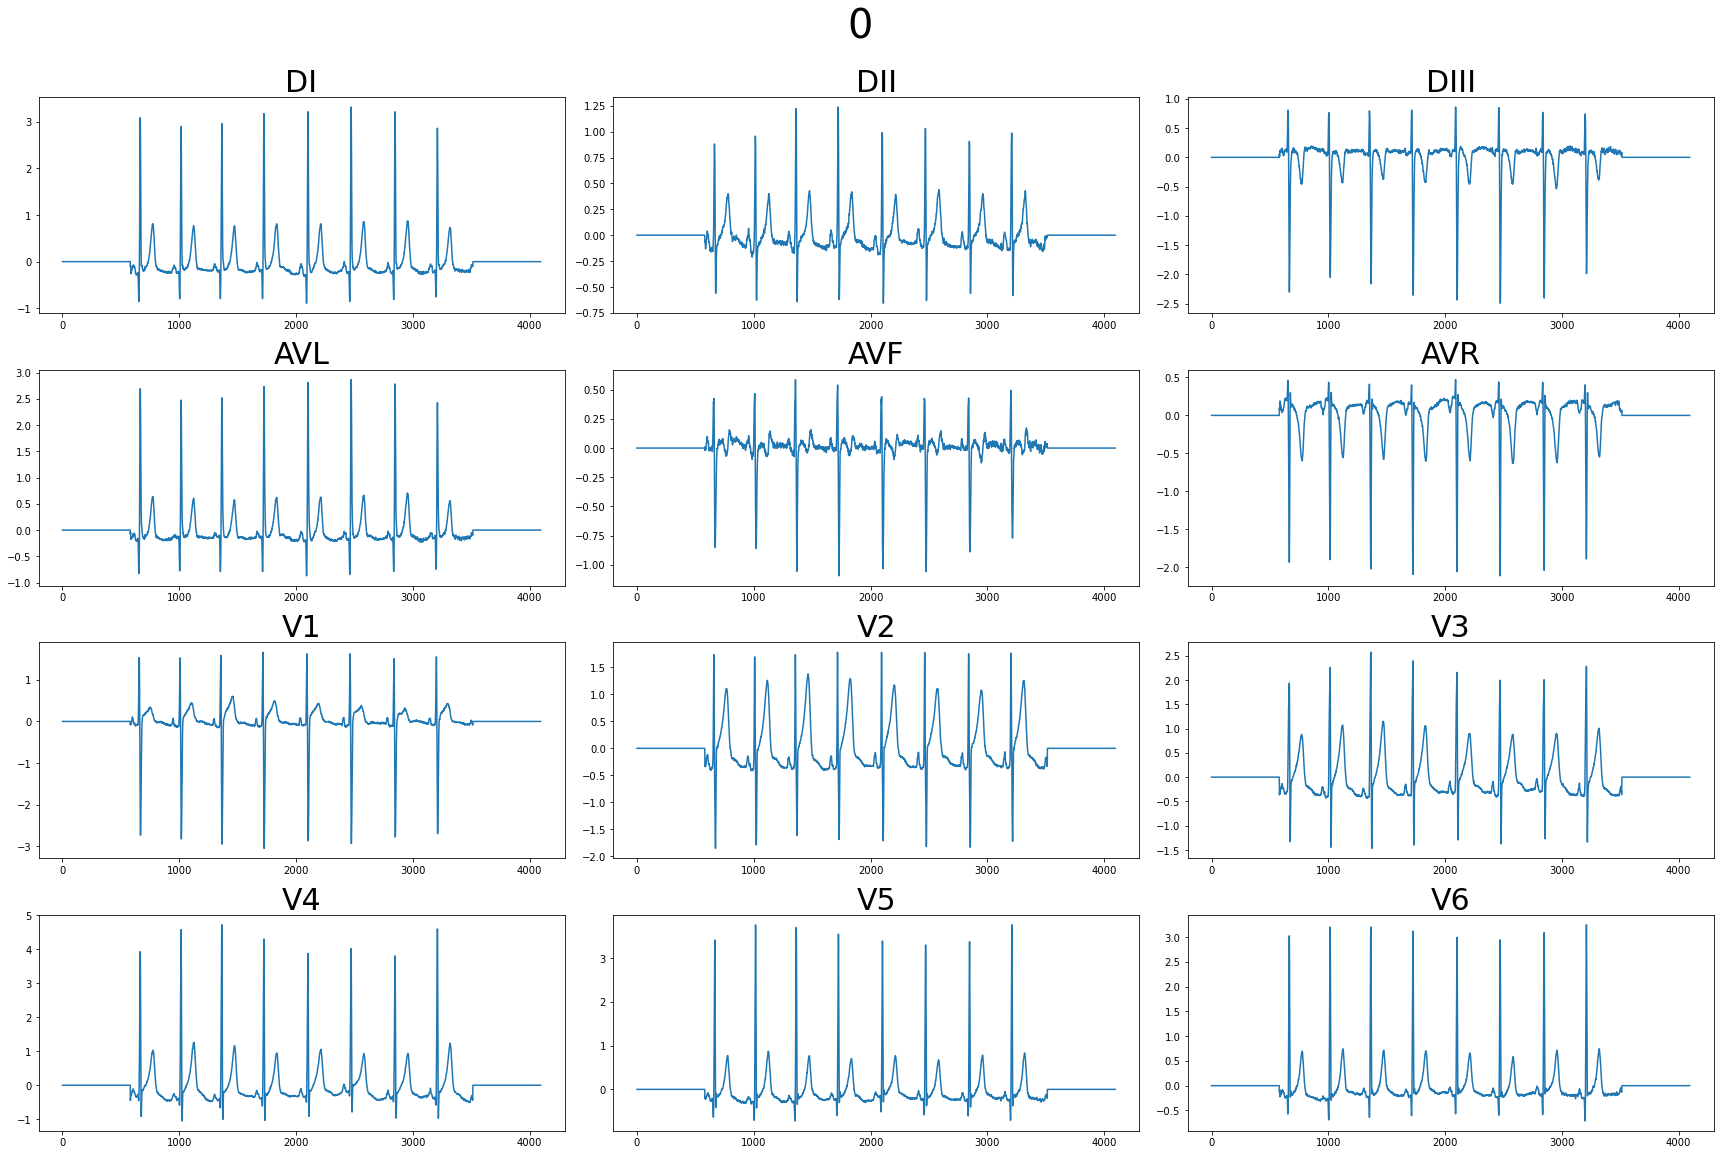

In [2]:
X = tests.load_datas(ECG_DIR + "ecg_tracings.hdf5")
plotter.plot_ECG_no(X, 0)

Le code utilisé pour entraîner les modèles et faire les prédictions est le suivant:

```python
def train(ecg_hdf5, annot_csv, model_name):
    cmd = "python {0}train.py {1} {2}".format(
        SCRIPTS_DIR, ecg_hdf5, annot_csv)
    call(cmd, "train.py")

    rename("backup_model_best.hdf5", "backup_" + model_name + "_best.hdf5")
    rename("backup_model_last.hdf5", "backup_" + model_name + "_last.hdf5")
    rename("final_model.hdf5", model_name + "_model.hdf5")


def predict(ecg_hdf5, model_name, pred_name=None):
    if model_name is None:
        model_hdf5 = "final_model.hdf5"
    else:
        model_hdf5 = model_name + "_model.hdf5"

    cmd = "python {0}predict.py {1} {2}".format(
        SCRIPTS_DIR, ecg_hdf5, model_hdf5)
    call(cmd, "predict.py")

    pred_name = "" if pred_name is None else "_" + pred_name
    rename("dnn_output.npy", model_name + pred_name + "_output.npy")
```

Un appel direct aux scripts écrits par [antonior92](https://github.com/antonior92/automatic-ecg-diagnosis) est effectué. Les fonctions `train_ribeiro` et `predict_ribeiro` se contentent de fournir les bons noms de fichiers.

In [ ]:
runner.train_ribeiro()
runner.predict_ribeiro()

L'entraînement a été effectué sur toutes les données et on affiche les tables d'erreurs sur chacune des anomalies que l'on souhaitait identifier. A priori ça fonctionne bien.

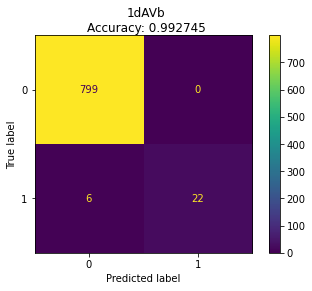

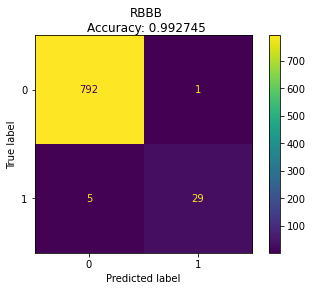

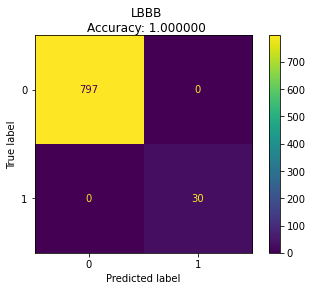

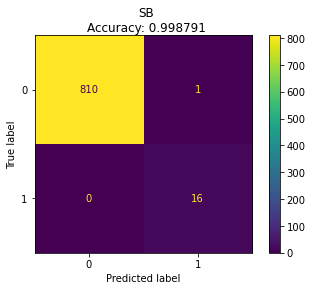

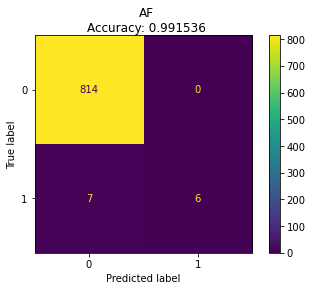

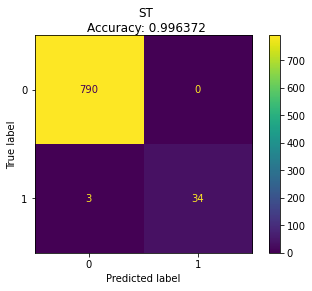

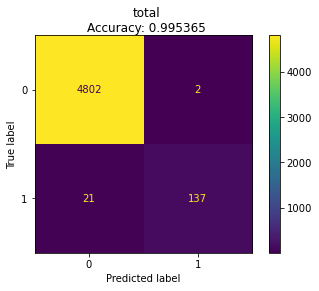

In [3]:
_, pred = tests.load_prediction("ribeiro_output.npy", ABNORMALITIES)
Y = tests.load_annotations(ECG_DIR + "annotations/gold_standard.csv")
ribeiro_err = tests.cross_tables(Y, pred)

for name in ribeiro_err.keys():
    plotter.plot_cross_table(ribeiro_err, name)

## Les données "PTBXL"

Pour pouvoir réutiliser les scripts précédent, il a fallu convertir les données au format `hdf5`. C'est ce que l'on a fait et on a obtenu un gros fichier de 3,5 Gio.\
On s'est appuyer sur le fichier qui nous avait été fourni à un moment donné et qui a été un peu retouché. Voir le fichier `load_ptbxl.py` pour les détails.

In [4]:
import load_ptbxl as ptbxl

In [ ]:
ptbxl.convert_for_model()

Une fois cela fait on a pu manipuler les données de la même manière que précédement.

Start of load_ptbxl2
load_ptbxl2 done in 9.017625 seconds


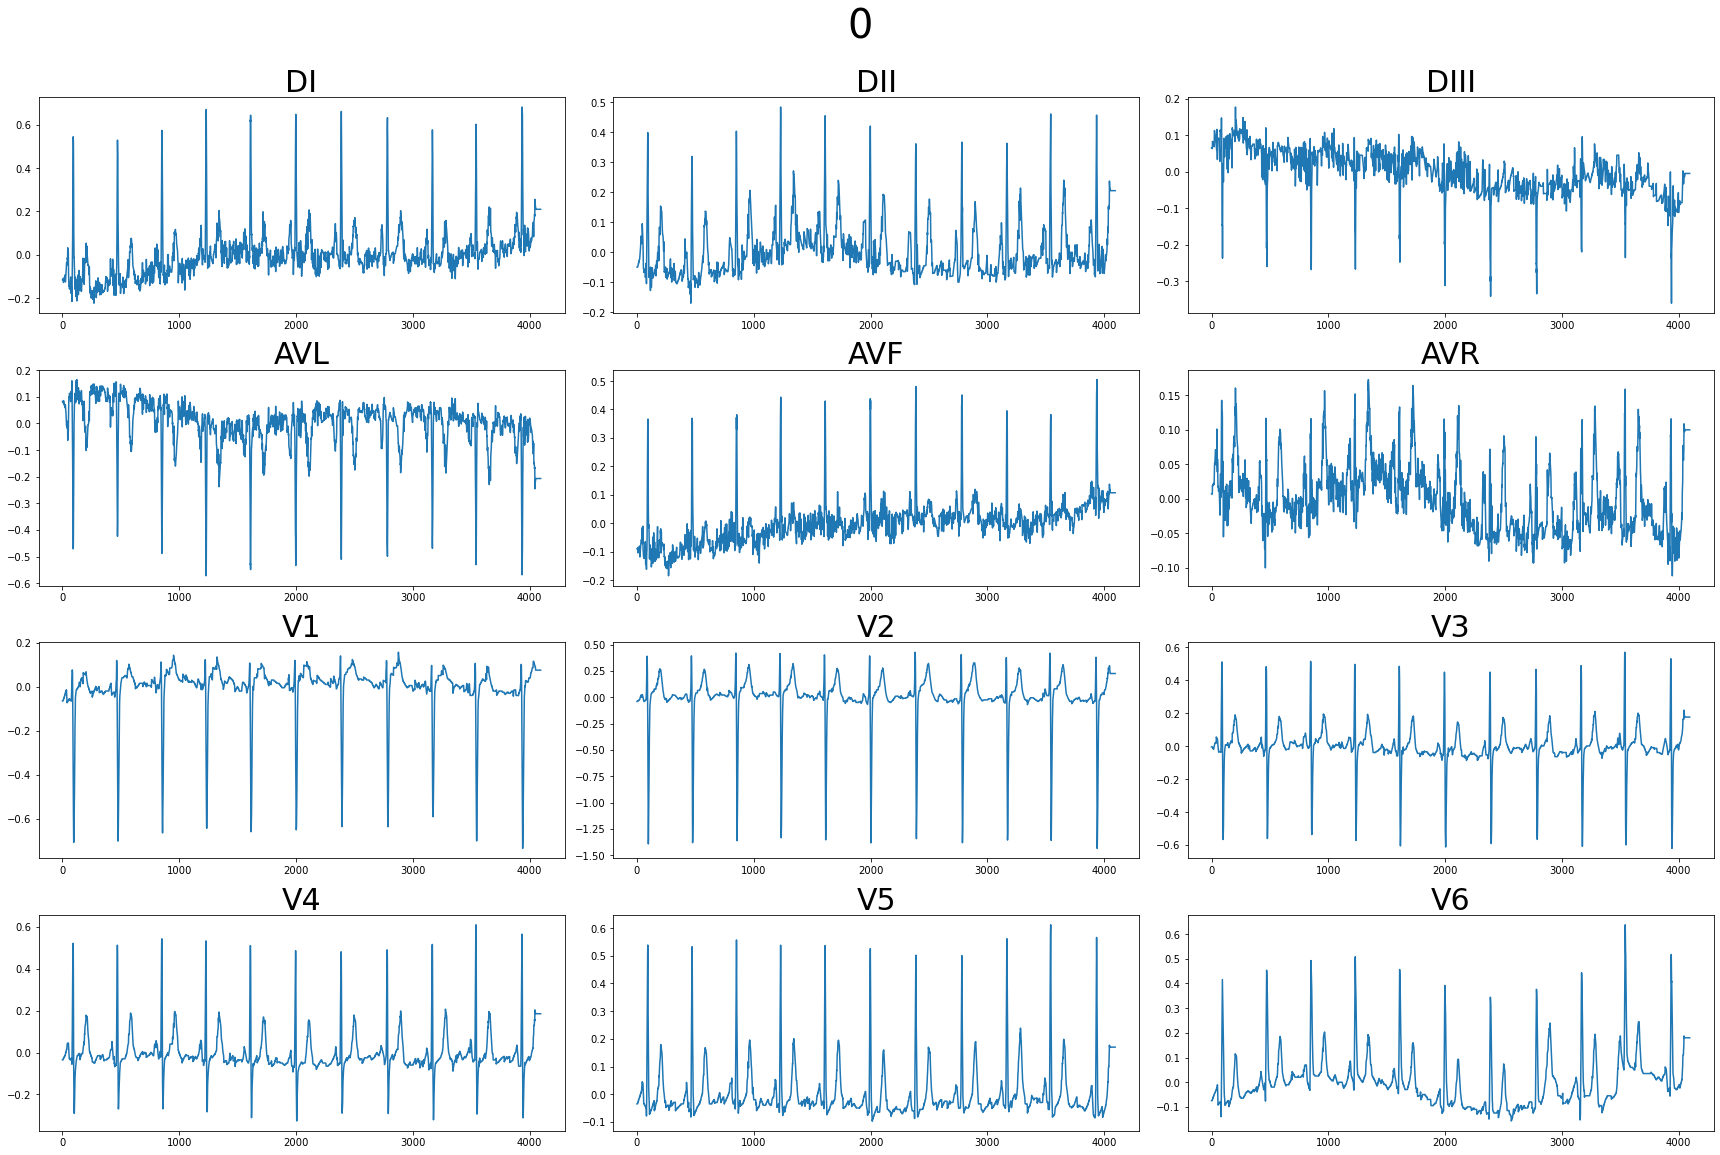

In [5]:
X_train, Y_train, X_test, Y_test = ptbxl.load_ptbxl2()
plotter.plot_ECG_no(X_train, 0)

L'entraînement et la prédiction réutilisent les fonctions dont on a parlé plus haut.

In [ ]:
runner.train_ptbxl()
runner.predict_ptbxl("train")
runner.predict_ptbxl("test")

On peux s'intéresser aux tables d'erreurs obtenues pour l'entraînement et les données de tests.

In [6]:
_, pred_train = tests.load_prediction("ptbxl_train_output.npy", DISEASES)
_, pred_test = tests.load_prediction("ptbxl_test_output.npy", DISEASES)

train_err = tests.cross_tables(Y_train, pred_train)
test_err = tests.cross_tables(Y_test, pred_test)

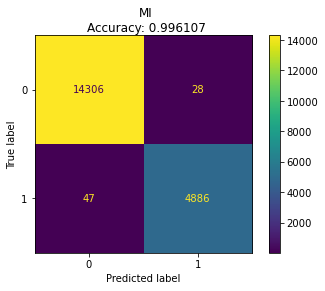

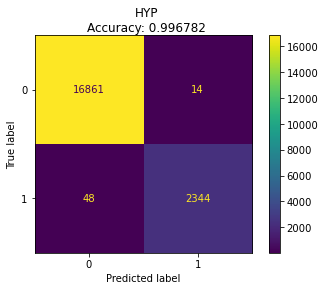

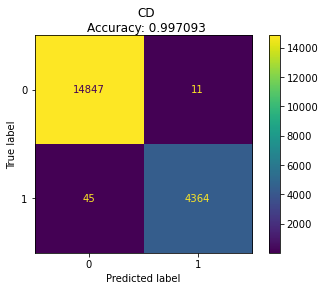

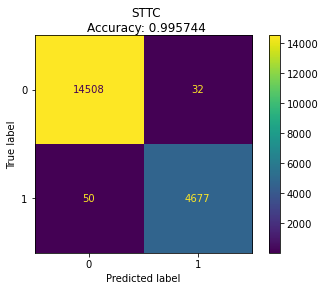

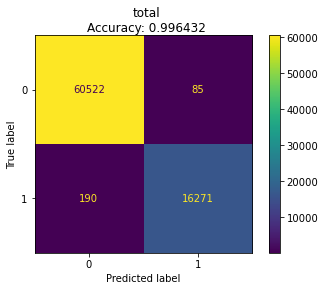

In [7]:
for name in train_err.keys():
    plotter.plot_cross_table(train_err, name)

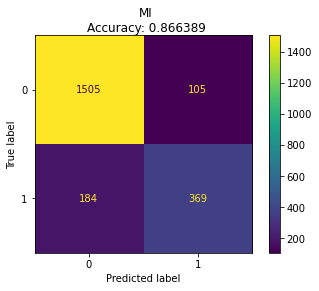

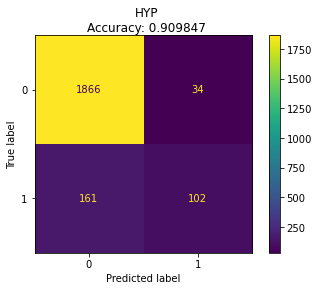

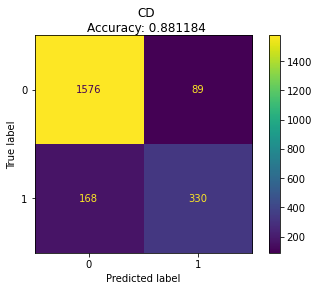

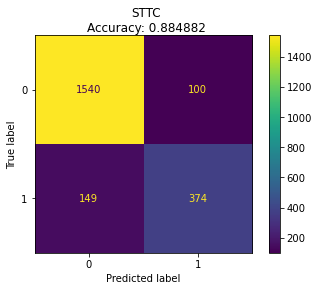

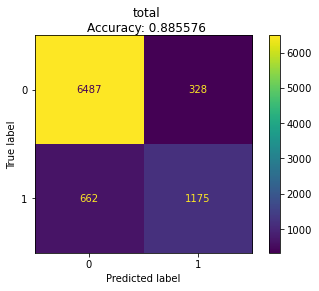

In [8]:
for name in test_err.keys():
    plotter.plot_cross_table(test_err, name)

C'est tout ce que l'on a proposer.